In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.cuda.is_available()

True

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
device

'cuda'

In [5]:
torch.__version__

'1.10.2'

In [6]:
import torchvision

In [8]:
from torchvision.transforms import ToTensor

In [16]:
train_ds = torchvision.datasets.MNIST(
    'data',
    train=True,
    transform=ToTensor(),
    download=True
)

In [17]:
test_ds = torchvision.datasets.MNIST(
    'data',
    train=False,
    transform=ToTensor(),
    download=True
)

In [18]:
train_dl = torch.utils.data.DataLoader(
    train_ds,
    batch_size=32,
    shuffle=True
)

In [19]:
test_dl = torch.utils.data.DataLoader(
    test_ds,
    batch_size=32
)

In [20]:
imgs , labels = next(iter(train_dl))

In [21]:
imgs.shape

torch.Size([32, 1, 28, 28])

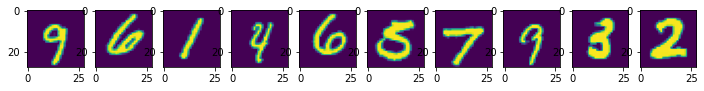

In [23]:
plt.figure(figsize=(12,8))
for i,img in enumerate(imgs[:10]):
    npimg = img.numpy()
    npimg = np.squeeze(npimg)
    plt.subplot(1,10,i+1)
    plt.imshow(npimg)

In [24]:
labels[:10]

tensor([9, 6, 1, 4, 6, 5, 7, 9, 3, 2])

# Tensorboard导入

可视化需要两个步骤：
    1.在代码中将需要可视化的数据写入磁盘的某个位置（文件位置）
    2.在命令行中打开tensorboard，并指定写入的文件位置，进行可视化、

In [25]:
from torch.utils.tensorboard import SummaryWriter

In [26]:
writer = SummaryWriter('my_log/minst')

# 显示图片

In [27]:
img , labels = next(iter(train_dl))

In [28]:
img_grid = torchvision.utils.make_grid(imgs[:8])

In [29]:
img_grid.shape

torch.Size([3, 32, 242])

In [30]:
npimg = img_grid.permute(1,2,0).numpy()

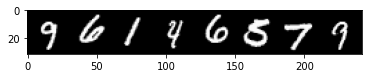

In [31]:
plt.imshow(npimg)

In [33]:
#写入
writer.add_image('eight_imgs',img_grid)

In [34]:
#打开
#    在anaconda prompt中使用tensorboard --logdir=位置 命令
#    得到返回的服务器网址打开

# 动态显示

In [35]:
img_grid = torchvision.utils.make_grid(imgs[-8:])

In [36]:
writer.add_image('last_eight_imgs',img_grid)

# 创建模型

In [37]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d((2,2))
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*4*4,256)
        self.fc2 = nn.Linear(256,10)
        
    def forward(self,input):
        x = F.relu(self.conv1(input))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = x.view(-1,16*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [38]:
model = Model()

# 显示模型

In [39]:
#将模型写入到tensorboard中
writer.add_graph(model,imgs)

# 标量数据的可视化

## 动态显示训练过程中的loss和acc的变化

In [40]:
model.to(device)

Model(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [41]:
loss_fn = nn.CrossEntropyLoss()

In [42]:
opt = torch.optim.SGD(model.parameters(),lr=0.001)